In [33]:
import os
import pandas as pd
import uproot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
import seaborn as sns


In [40]:

# low X 
lowX = [
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X300_Y60/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X300_Y70/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X300_Y80/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X300_Y90/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X300_Y95/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X300_Y100/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X300_Y125/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X400_Y60/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X400_Y70/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X400_Y80/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X400_Y90/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X400_Y95/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X400_Y100/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X400_Y125/preselection"),
]

# mid X 
midX = [
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X500_Y60/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X500_Y70/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X500_Y80/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X500_Y90/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X500_Y95/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X500_Y100/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X500_Y125/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X550_Y60/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X550_Y70/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X550_Y80/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X550_Y90/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X550_Y95/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X550_Y100/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X550_Y125/preselection"),
]

# high X 
highX = [
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X600_Y60/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X600_Y70/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X600_Y80/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X600_Y90/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X600_Y95/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X600_Y100/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X600_Y125/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X650_Y60/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X650_Y70/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X650_Y80/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X650_Y90/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X650_Y95/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X650_Y100/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X650_Y125/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X700_Y60/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X700_Y70/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X700_Y80/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X700_Y90/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X700_Y95/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X700_Y100/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/NMSSM_X700_Y125/preselection"),
]

background_files = [
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/GGJets/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/GJetPt20To40/preselection"),
    ("../../outputfiles/hhbbgg_analyzerNMSSM-trees.root", "/GJetPt40/preselection"),
]

In [41]:
# Columns to be loaded
keys = [
     'dibjet_pt', 'diphoton_pt', 'bbgg_pt', 'bbgg_eta', 'bbgg_phi',
    'lead_pho_phi', 'sublead_pho_eta', 'sublead_pho_phi', 'diphoton_eta', 
    'diphoton_phi', 'dibjet_eta', 'dibjet_phi', 'lead_bjet_pt', 'sublead_bjet_pt', 
    'lead_bjet_eta', 'lead_bjet_phi', 'sublead_bjet_eta', 'sublead_bjet_phi', 
    'sublead_bjet_PNetB', 'lead_bjet_PNetB', 'CosThetaStar_gg', 'CosThetaStar_jj', 
    'CosThetaStar_CS', 'DeltaR_jg_min',   'pholead_PtOverM', 'phosublead_PtOverM',
    'weight_preselection','lead_pho_mvaID','sublead_pho_mvaID',
]
# Variables removed :- 'bbgg_mass','FirstJet_PtOverM', 'SecondJet_PtOverM', 'diphoton_bbgg_mass', 'dibjet_bbgg_mass', 'lead_pho_eta',


In [42]:
# Load DataFrames
dfs = {}

# Load lowX files
for file, key in lowX:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")

# Load midX files
for file, key in midX:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")
        
# Load highX files
for file, key in highX:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")
        

# Load background files
for file, key in background_files:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")




In [43]:
# Combine files based on X and Y ranges
# lowX_lowY (X = 300, 400, Y = 60, 70)
lowX_lowY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X300' in key or 'NMSSM_X400' in key) and ('Y60' in key or 'Y70' in key)], ignore_index=True)

# lowX_highY (X = 300, 400, Y = 95, 100, 125)
lowX_highY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X300' in key or 'NMSSM_X400' in key) and ('Y95' in key or 'Y100' in key or 'Y125' in key)], ignore_index=True)

# midX_midY (X = 500, 550, Y = 80, 90)
midX_midY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X500' in key or 'NMSSM_X550' in key) and ('Y80' in key or 'Y90' in key)], ignore_index=True)

# midX_highY (X = 500, 550, Y = 95, 100, 125)
midX_highY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X500' in key or 'NMSSM_X550' in key) and ('Y95' in key or 'Y100' in key or 'Y125' in key)], ignore_index=True)

# highX_lowY (X = 600, 650, 700, Y = 60, 70)
highX_lowY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X600' in key or 'NMSSM_X650' in key or 'NMSSM_X700' in key) and ('Y60' in key or 'Y70' in key)], ignore_index=True)

# highX_highY (X = 600, 650, 700, Y = 95, 100, 125)
highX_highY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X600' in key or 'NMSSM_X650' in key or 'NMSSM_X700' in key) and ('Y95' in key or 'Y100' in key or 'Y125' in key)], ignore_index=True)


In [44]:
# Combine files for signals based on X and Y ranges
# Signal 1: lowX_lowY (X = 300, 400, Y = 60, 70)
signal_lowX_lowY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X300' in key or 'NMSSM_X400' in key) and ('Y60' in key or 'Y70' in key)], ignore_index=True)

# Signal 2: lowX_highY (X = 300, 400, Y = 95, 100, 125)
signal_lowX_highY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X300' in key or 'NMSSM_X400' in key) and ('Y95' in key or 'Y100' in key or 'Y125' in key)], ignore_index=True)

# Signal 3: midX_midY (X = 500, 550, Y = 80, 90)
signal_midX_midY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X500' in key or 'NMSSM_X550' in key) and ('Y80' in key or 'Y90' in key)], ignore_index=True)

# Signal 4: midX_highY (X = 500, 550, Y = 95, 100, 125)
signal_midX_highY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X500' in key or 'NMSSM_X550' in key) and ('Y95' in key or 'Y100' in key or 'Y125' in key)], ignore_index=True)

# Signal 5: highX_lowY (X = 600, 650, 700, Y = 60, 70)
signal_highX_lowY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X600' in key or 'NMSSM_X650' in key or 'NMSSM_X700' in key) and ('Y60' in key or 'Y70' in key)], ignore_index=True)

# Signal 6: highX_highY (X = 600, 650, 700, Y = 95, 100, 125)
signal_highX_highY_df = pd.concat([dfs[key] for key in dfs if ('NMSSM_X600' in key or 'NMSSM_X650' in key or 'NMSSM_X700' in key) and ('Y95' in key or 'Y100' in key or 'Y125' in key)], ignore_index=True)

# Background 1: ggJets_df
ggJets_df = pd.concat([dfs[key] for key in dfs if 'GGJets' in key], ignore_index=True)

# Background 2: gJetPt_df
gJetPt_df = pd.concat([dfs[key] for key in dfs if 'GJetPt' in key], ignore_index=True)


In [157]:
# Check if 'weight_preselection' exists in all DataFrames
if 'weight_preselection' not in signal_df.columns or 'weight_preselection' not in background_df.columns:
    print("Error: 'weight_preselection' column missing in one or more DataFrames.")
    exit()

# Assign labels
signal_midX_midY_df['label'] = 1
gJetPt_df['label'] = 0

In [158]:
# Combine signal and background data
combined_df = pd.concat([signal_midX_midY_df, gJetPt_df], ignore_index=True)
print(f'Combined DataFrame Shape: {combined_df.shape}')

# Define features and labels
features = [
    'bbgg_eta', 'bbgg_phi', 'lead_pho_phi', 'sublead_pho_eta', 
    'sublead_pho_phi', 'diphoton_eta', 'diphoton_phi', 'dibjet_eta', 'dibjet_phi', 
    'lead_bjet_pt', 'sublead_bjet_pt', 'lead_bjet_eta', 'lead_bjet_phi', 'sublead_bjet_eta', 
    'sublead_bjet_phi', 'sublead_bjet_PNetB', 'lead_bjet_PNetB', 'CosThetaStar_gg', 
    'CosThetaStar_jj', 'CosThetaStar_CS', 'DeltaR_jg_min', 'pholead_PtOverM', 
    'phosublead_PtOverM','lead_pho_mvaID','sublead_pho_mvaID'
]
# variables removed:  'bbgg_mass',  'lead_pho_eta','FirstJet_PtOverM', 'SecondJet_PtOverM', 'diphoton_bbgg_mass', 'dibjet_bbgg_mass'

Combined DataFrame Shape: (168215, 30)


In [159]:

X = combined_df[features]
y = combined_df['label']
weights = combined_df['weight_preselection']

# Impute missing values and scale the data
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Extract weights for train and test datasets
X_train_weights = combined_df.loc[X_train.index, 'weight_preselection']
X_test_weights = combined_df.loc[X_test.index, 'weight_preselection']

# Impute and scale the features
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [160]:
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
X_train_weights_tensor = torch.tensor(X_train_weights.values, dtype=torch.float32)
X_test_weights_tensor = torch.tensor(X_test_weights.values, dtype=torch.float32)

# Create TensorDataset and DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor, X_train_weights_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor, X_test_weights_tensor)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)



In [161]:
# Define the neural network model
class SimpleDNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 16)
        self.bn4 = nn.BatchNorm1d(16)
        self.dropout = nn.Dropout(0.3)
        self.output = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.relu(self.bn4(self.fc4(x)))
        x = self.sigmoid(self.output(x))  # Should be a single output for binary classification
        return x

In [162]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    print("GPU is available.")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")


GPU is not available.


In [163]:
import torch
import torch.nn as nn
from torch.optim import Adam

# Initialize the model
input_dim = X_train.shape[1]
model = SimpleDNN(input_dim)  # No device assignment needed
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    preds = (outputs > 0.5).float()  # Convert outputs to binary predictions
    correct = (preds == labels).float().sum()  # Count correct predictions
    accuracy = correct / labels.size(0)  # Compute accuracy
    return accuracy

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_accuracy = 0.0
    for X_batch, y_batch, weight_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_accuracy += calculate_accuracy(outputs, y_batch).item()

    # Average training accuracy
    train_accuracy /= len(train_loader)
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)


    # Evaluate on test data
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0
    test_outputs = []
    test_labels = []
    with torch.no_grad():
        for X_batch, y_batch, weight_batch in test_loader:
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            test_loss += loss.item()
            test_outputs.append(outputs.numpy())
            test_labels.append(y_batch.numpy())
    
    # Combine lists into numpy arrays
    test_outputs = np.concatenate(test_outputs)
    test_labels = np.concatenate(test_labels)
    
    # Calculate test accuracy
    test_accuracy = calculate_accuracy(torch.tensor(test_outputs), torch.tensor(test_labels)).item()

    print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Epoch {epoch + 1}/{epochs}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

    
# Save the model
torch.save(model.state_dict(), 'modelFile/midX_midY_single_background_gJet_simple_dnn_model.pth')
print("Model saved successfully.")


Epoch 1/50, Train Loss: 498.2776, Train Accuracy: 0.9601
Epoch 1/50, Test Loss: 86.1102, Test Accuracy: 0.9707
Epoch 2/50, Train Loss: 367.2917, Train Accuracy: 0.9702
Epoch 2/50, Test Loss: 78.9417, Test Accuracy: 0.9736
Epoch 3/50, Train Loss: 337.2395, Train Accuracy: 0.9725
Epoch 3/50, Test Loss: 75.4632, Test Accuracy: 0.9755
Epoch 4/50, Train Loss: 324.4253, Train Accuracy: 0.9728
Epoch 4/50, Test Loss: 73.6633, Test Accuracy: 0.9757
Epoch 5/50, Train Loss: 320.3455, Train Accuracy: 0.9734
Epoch 5/50, Test Loss: 77.9011, Test Accuracy: 0.9735
Epoch 6/50, Train Loss: 314.5819, Train Accuracy: 0.9734
Epoch 6/50, Test Loss: 73.0965, Test Accuracy: 0.9761
Epoch 7/50, Train Loss: 310.7454, Train Accuracy: 0.9739
Epoch 7/50, Test Loss: 71.9717, Test Accuracy: 0.9766
Epoch 8/50, Train Loss: 306.4095, Train Accuracy: 0.9742
Epoch 8/50, Test Loss: 73.4111, Test Accuracy: 0.9764
Epoch 9/50, Train Loss: 306.2599, Train Accuracy: 0.9742
Epoch 9/50, Test Loss: 73.6300, Test Accuracy: 0.9760
E

Final AUC Score for Train Data: 0.9978
Final AUC Score for Test Data: 0.9970


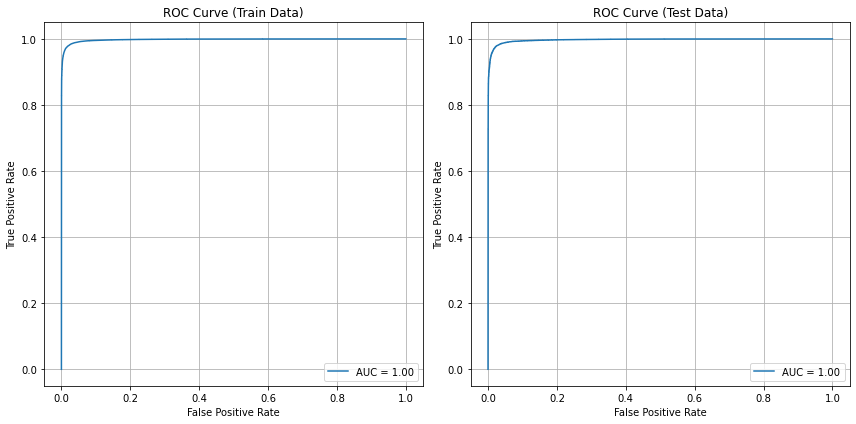

In [164]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Move tensors to CPU before converting to NumPy arrays
y_train_pred = model(X_train_tensor).cpu().detach().numpy()
y_test_pred = model(X_test_tensor).cpu().detach().numpy()


# Calculate AUC for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)


# Print AUC scores
print(f'Final AUC Score for Train Data: {roc_auc_train:.4f}')
print(f'Final AUC Score for Test Data: {roc_auc_test:.4f}')


# Plot ROC curves and calculate AUC
def plot_roc(y_true, y_pred, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.grid(True)
    plt.legend()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_roc(y_train, y_train_pred, 'ROC Curve (Train Data)')

plt.subplot(1, 2, 2)
plot_roc(y_test, y_test_pred, 'ROC Curve (Test Data)')

plt.tight_layout()
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/plots_v1/NMSSM_signal/ML_plots/single_background_gJet_midX_midY_ROC.png")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/plots_v1/NMSSM_signal/ML_plots/single_background_gJet_midX_midY_ROC.pdf")
plt.show()


ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

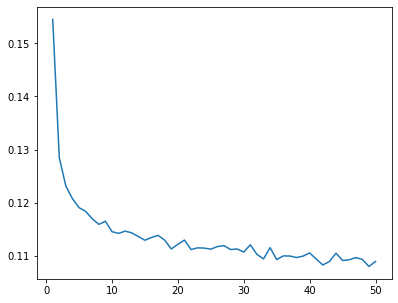

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Plot Training and Testing Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.grid(True)
plt.legend()

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


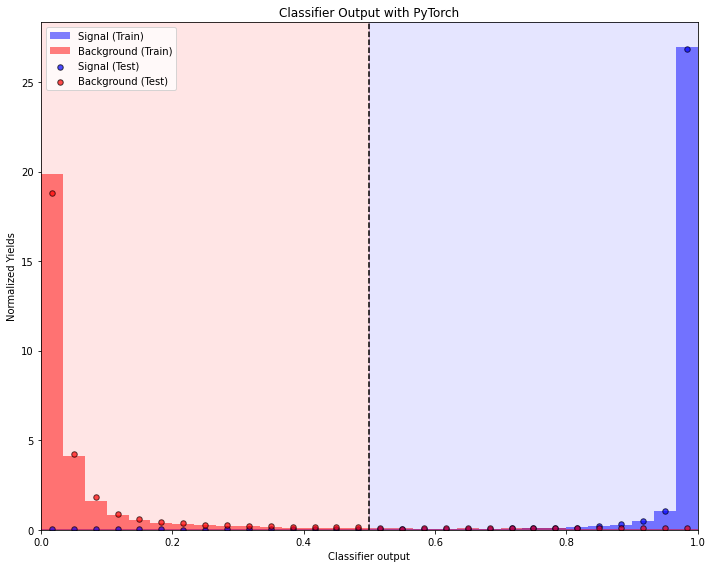

In [165]:
# Define a function to get predictions from the PyTorch model
def get_predictions(loader, model):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels, _ in loader:
            outputs = model(inputs)
            outputs = outputs.squeeze()
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_preds), np.array(all_labels)
# Get predictions for training and test data
train_preds, train_true = get_predictions(train_loader, model)
test_preds, test_true = get_predictions(test_loader, model)

# Convert weights tensors to NumPy arrays
X_train_weights_np = X_train_weights_tensor.numpy()
X_test_weights_np = X_test_weights_tensor.numpy()

# Define bins
bins = np.linspace(0, 1, 31)  

# Calculate histograms and bins for training data with weights
train_hist_s, _ = np.histogram(train_preds[train_true == 1], bins=bins, density=True, weights=X_train_weights_np[train_true == 1])
train_hist_b, _ = np.histogram(train_preds[train_true == 0], bins=bins, density=True, weights=X_train_weights_np[train_true == 0])

# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot histograms for training data
plt.figure(figsize=(10, 8))
plt.hist(train_preds[train_true == 1], bins=bins, color='blue', alpha=0.5, label='Signal (Train)', density=True, weights=X_train_weights_np[train_true == 1])
plt.hist(train_preds[train_true == 0], bins=bins, color='red', alpha=0.5, label='Background (Train)', density=True, weights=X_train_weights_np[train_true == 0])

# Calculate histograms for test data
test_hist_s, _ = np.histogram(test_preds[test_true == 1], bins=bins, density=True, weights=X_test_weights_np[test_true == 1])
test_hist_b, _ = np.histogram(test_preds[test_true == 0], bins=bins, density=True, weights=X_test_weights_np[test_true == 0])

# Plot scatter points for test data
plt.scatter(bin_centers, test_hist_s, color='blue', alpha=0.7, label='Signal (Test)', marker='o', s=30, edgecolor='k')
plt.scatter(bin_centers, test_hist_b, color='red', alpha=0.7, label='Background (Test)', marker='o', s=30, edgecolor='k')


# Add background colors
plt.axvspan(0, 0.5, color='red', alpha=0.1)
plt.axvspan(0.5, 1, color='blue', alpha=0.1)

plt.axvline(0.5, color='k', linestyle='--')
plt.xlabel('Classifier output')
plt.ylabel('Normalized Yields')
plt.xlim(0,1)
plt.legend()
plt.title('Classifier Output with PyTorch')

# Save and display the plotpurple
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/plots_v1/NMSSM_signal/ML_plots/single_background_gJet_midX_midY_classifier_output_plot.png")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/plots_v1/NMSSM_signal/ML_plots/single_background_gJet_midX_midY_classifier_output_plot.pdf")
plt.tight_layout()
plt.show()

# Variable ranking 

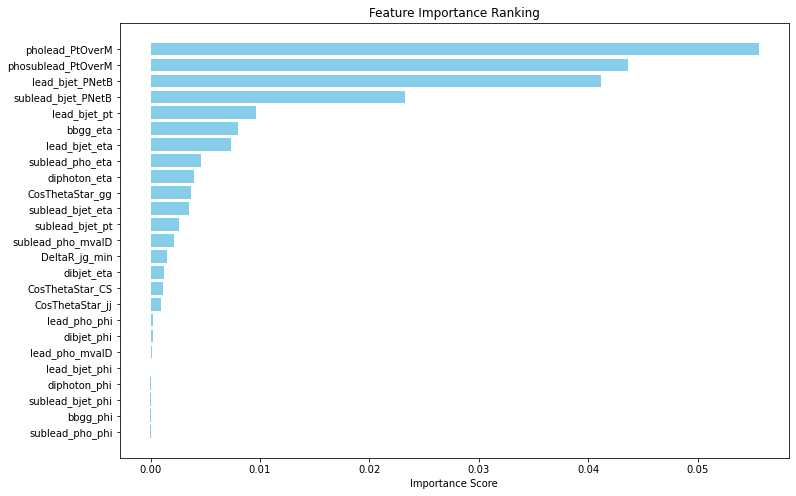

In [166]:
from sklearn.metrics import accuracy_score
import numpy as np

def permutation_importance(model, X_val, y_val, baseline_acc, n_repeats=10):
    """
    Calculate permutation importance for a given model on validation data.
    
    Parameters:
    - model: Trained PyTorch model
    - X_val: Validation features (numpy array)
    - y_val: Validation labels (numpy array)
    - baseline_acc: Baseline accuracy of the model on unperturbed data
    - n_repeats: Number of shuffles for each feature

    Returns:
    - importances: A dictionary with features as keys and importance scores
    """
    importances = {col: [] for col in range(X_val.shape[1])}  # Create dictionary to store importances
    X_val_copy = X_val.copy()  # Create a copy of the validation data

    for col in range(X_val.shape[1]):  # Loop over each feature
        permuted_acc = []
        for _ in range(n_repeats):
            np.random.shuffle(X_val_copy[:, col])  # Randomly shuffle one feature column
            with torch.no_grad():
                outputs = model(torch.tensor(X_val_copy, dtype=torch.float32)).squeeze()
                permuted_acc.append(accuracy_score(y_val, (outputs > 0.5).numpy()))
        # Calculate importance as the difference between baseline and permuted accuracy
        importances[col] = baseline_acc - np.mean(permuted_acc)
        X_val_copy[:, col] = X_val[:, col]  # Reset column to original values

    return importances


# Compute baseline accuracy on validation data
with torch.no_grad():
    baseline_outputs = model(X_test_tensor).squeeze()
    baseline_accuracy = accuracy_score(y_test, (baseline_outputs > 0.5).numpy())

# Calculate permutation importance
feature_importances = permutation_importance(model, X_test_scaled, y_test.values, baseline_accuracy)


# Extract feature names and their corresponding importances
feature_names = features  # List of feature names from your dataset
importance_values = [feature_importances[i] for i in range(len(feature_names))]

# Sort features by importance
sorted_indices = np.argsort(importance_values)[::-1]
sorted_importances = np.array(importance_values)[sorted_indices]
sorted_features = np.array(feature_names)[sorted_indices]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance Ranking')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/plots_v1/NMSSM_signal/single_background_gJet_midX_midY_variable_Ranking_plot.png")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/plots_v1/NMSSM_signal/single_background_gJet_midX_midY_variable_Ranking_plot.pdf")
plt.show()